In [1]:
import random

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sympy

In [5]:
[a,b,c,d] = [random.uniform(0,3),random.uniform(3,5),random.uniform(5,7),random.uniform(7,10)]

In [6]:
N = 7000

In [7]:
x = np.linspace(0, 10, N+1)

In [8]:
def f(x,a,b,c,d):
    f = (x-a)*(x-b)*(x-c)*(x-d)
    return f

In [9]:
x0 = sympy.Symbol("x0")

In [10]:
y1 = f(x0,a,b,c,d)

In [11]:
y2 = y1.diff()

In [12]:
max_min_x = [complex(el).real for el in sympy.solve(y2)]

In [13]:
max_min_y = [f(el,a,b,c,d) for el in max_min_x]

In [14]:
odl1 = max_min_y[1]-max_min_y[0]

In [15]:
odl2 = max_min_y[1]-max_min_y[2]

In [16]:
[s1x, s2x] = [max_min_x[i] + ((max_min_x[i+1]-max_min_x[i])/2) for i in range(2)]

In [17]:
s1y = max_min_y[0] + (odl1/2)

In [18]:
s2y = max_min_y[2] + (odl2/2)

In [19]:
monotonicity_intervals = [(0, max_min_x[0]), (max_min_x[0], max_min_x[1]), (max_min_x[1], max_min_x[2]), (max_min_x[2], 10)]

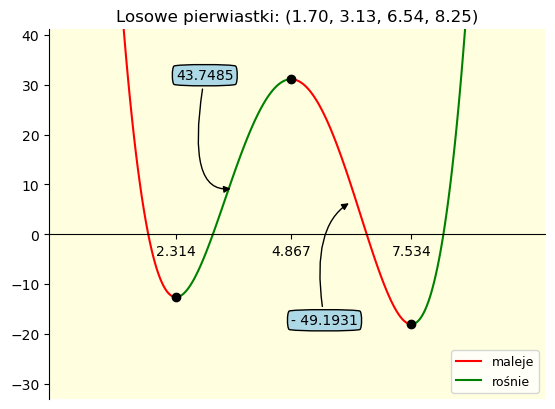

In [20]:
fig = plt.figure()
ax = fig.add_subplot(facecolor='lightyellow')

for i, (x_start, x_end) in enumerate(monotonicity_intervals):
    x_segment = np.linspace(x_start, x_end, 100)
    if i%2 == 0:
        plt.plot(x_segment, f(x_segment,a,b,c,d), color = 'red')
    else: 
        plt.plot(x_segment, f(x_segment,a,b,c,d), color = 'green')

        
plt.plot([], color='red', label='maleje')
plt.plot([], color='green', label='rośnie')

plt.legend(loc=4, fontsize=9)
plt.title('Losowe pierwiastki: ({:.2f}, {:.2f}, {:.2f}, {:.2f})'.format(a,b,c,d))

ax.annotate('{:.4f}'.format(odl1), xy = (s1x, s1y), xytext=(max_min_x[0], max_min_y[1]),
            arrowprops=dict(facecolor="black", arrowstyle='-|>', connectionstyle = 'angle3, angleA = 80, angleB = 10'), 
           bbox=dict(boxstyle='round4', facecolor='lightblue', edgecolor = 'black'))


ax.annotate('- {:.4f}'.format(odl2), xy = (s2x, s2y), xytext=(max_min_x[1], max_min_y[2]),
            arrowprops=dict(facecolor="black", arrowstyle='-|>', connectionstyle = 'angle3, angleA = 100, angleB = 30'), 
            bbox=dict(boxstyle='round4', facecolor='lightblue', edgecolor = 'black'))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')

ax.scatter(max_min_x, max_min_y, color = 'black', marker = 'o', zorder=2)
ax.set_ylim(min(max_min_y)-15, max(max_min_y)+10)
ax.set_xticks(max_min_x)

plt.savefig("zad01_Agata_Jastrzebska_281633.pdf")
plt.show()